Dataset Preview:
    DO   ph  BOD      TC
0  5.5  7.6  1.3   141.0
1  5.4  7.8  0.8   107.0
2  7.1  7.8  0.7  1238.0
3  6.9  8.0  0.9  1563.0
4  6.0  7.3  1.2    78.0

Missing Values:
DO     1046637
ph     1046637
BOD    1046637
TC     1046637
dtype: int64
Linear Regression Performance:
MAE: 0.9304
MSE: 3.2104
RMSE: 1.7918
R2 Score: -0.9361

Random Forest Performance:
MAE: 0.0339
MSE: 0.0484
RMSE: 0.2200
R2 Score: 0.9708

Support Vector Regression Performance:
MAE: 0.5077
MSE: 0.9188
RMSE: 0.9586
R2 Score: 0.4459



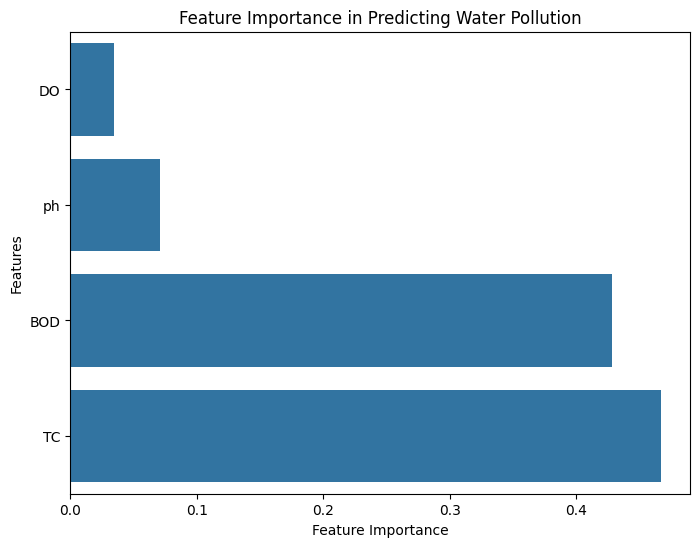

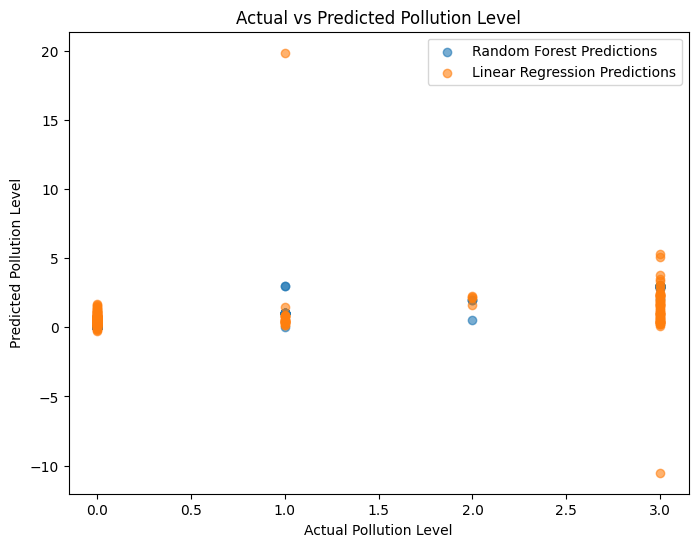

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file (Make sure to upload the file to Google Colab)
file_path = '/content/ganga water values.csv'  # Update the path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Define features and create a pollution level column based on thresholds
def classify_pollution(do, ph, bod, tc):
    if ph < 6.5 or ph > 8.5:
        return "Highly Polluted (Extreme pH)"
    elif bod > 5 or tc > 5000:
        return "Polluted (High BOD or TC)"
    elif do < 4:
        return "Moderately Polluted (Low DO)"
    else:
        return "Good Water Quality"

df['Pollution Level'] = df.apply(lambda row: classify_pollution(row['DO'], row['ph'], row['BOD'], row['TC']), axis=1)

# Encode categorical pollution level
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Pollution Level Encoded'] = le.fit_transform(df['Pollution Level'])

# Define features and target variable
X = df[['DO', 'ph', 'BOD', 'TC']]
y = df['Pollution Level Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf')

# Train models
lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
svr.fit(X_train_scaled, y_train)

# Function to predict pollution level
def predict_pollution(do, ph, bod, tc):
    input_data = np.array([[do, ph, bod, tc]])
    input_scaled = scaler.transform(input_data)
    prediction_rfr = int(rfr.predict(input_data)[0])
    prediction_svr = int(svr.predict(input_scaled)[0])
    prediction_lr = int(lr.predict(input_data)[0])

    pollution_category_rfr = le.inverse_transform([prediction_rfr])[0]
    pollution_category_svr = le.inverse_transform([prediction_svr])[0]
    pollution_category_lr = le.inverse_transform([prediction_lr])[0]

    print(f"Predicted Pollution Levels:")
    print(f"Linear Regression: {pollution_category_lr}")
    print(f"Random Forest: {pollution_category_rfr}")
    print(f"Support Vector Regression: {pollution_category_svr}")

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}\n")

# Print evaluation results
evaluate_model(y_test, lr.predict(X_test), "Linear Regression")
evaluate_model(y_test, rfr.predict(X_test), "Random Forest")
evaluate_model(y_test, svr.predict(X_test_scaled), "Support Vector Regression")

# Feature Importance from Random Forest
feature_importance = rfr.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Water Pollution")
plt.show()

# Scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rfr.predict(X_test), label="Random Forest Predictions", alpha=0.6)
plt.scatter(y_test, lr.predict(X_test), label="Linear Regression Predictions", alpha=0.6)
plt.xlabel("Actual Pollution Level")
plt.ylabel("Predicted Pollution Level")
plt.title("Actual vs Predicted Pollution Level")
plt.legend()
plt.show()

# Example usage
# predict_pollution(DO_value, pH_value, BOD_value, TC_value)
# Uncomment and provide values to predict

Dataset Preview:
    DO   ph  BOD      TC
0  5.5  7.6  1.3   141.0
1  5.4  7.8  0.8   107.0
2  7.1  7.8  0.7  1238.0
3  6.9  8.0  0.9  1563.0
4  6.0  7.3  1.2    78.0

Missing Values:
DO     1046637
ph     1046637
BOD    1046637
TC     1046637
dtype: int64
Linear Regression Performance:
MAE: 0.9304
MSE: 3.2104
RMSE: 1.7918
R2 Score: -0.9361

Random Forest Performance:
MAE: 0.0339
MSE: 0.0484
RMSE: 0.2200
R2 Score: 0.9708

Support Vector Regression Performance:
MAE: 0.5077
MSE: 0.9188
RMSE: 0.9586
R2 Score: 0.4459



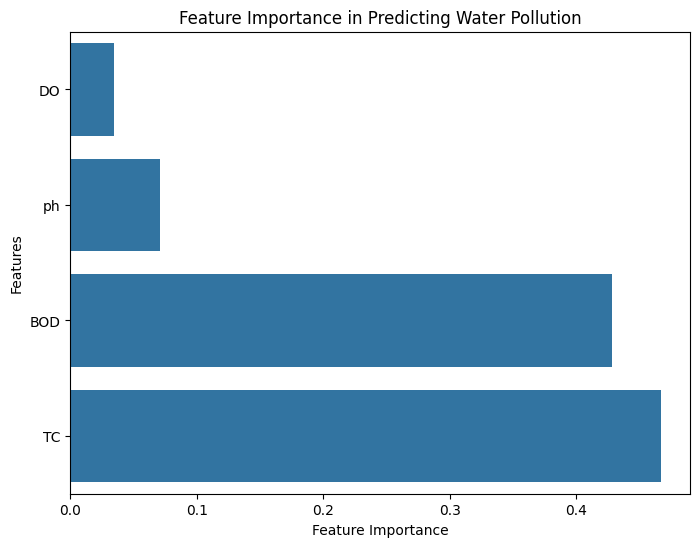

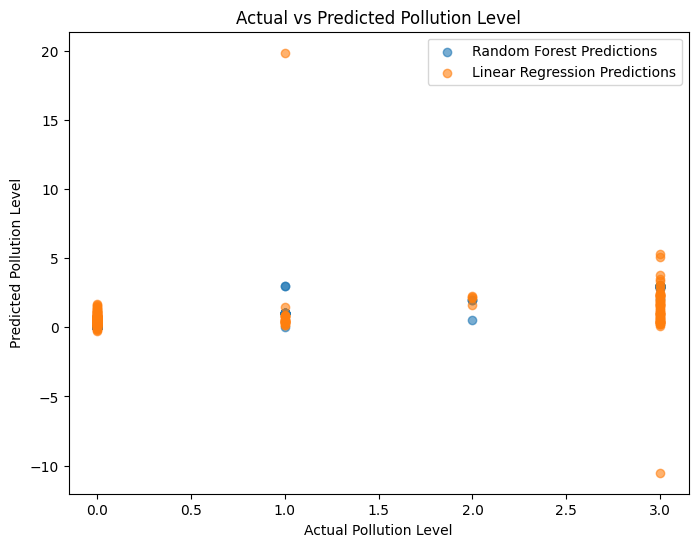

Enter Dissolved Oxygen (DO) value: 5.4
Enter pH value: 7.8
Enter Biochemical Oxygen Demand (BOD) value: 0.8
Enter Total Coliform (TC) value: 107
Predicted Pollution Levels:
Linear Regression: Highly Polluted (Extreme pH)
Random Forest: Good Water Quality
Support Vector Regression: Good Water Quality


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file (Make sure to upload the file to Google Colab)
file_path = '/content/ganga water values.csv'  # Update the path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Define features and create a pollution level column based on thresholds
def classify_pollution(do, ph, bod, tc):
    if ph < 6.5 or ph > 8.5:
        return "Highly Polluted (Extreme pH)"
    elif bod > 5 or tc > 5000:
        return "Polluted (High BOD or TC)"
    elif do < 4:
        return "Moderately Polluted (Low DO)"
    else:
        return "Good Water Quality"

df['Pollution Level'] = df.apply(lambda row: classify_pollution(row['DO'], row['ph'], row['BOD'], row['TC']), axis=1)

# Encode categorical pollution level
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Pollution Level Encoded'] = le.fit_transform(df['Pollution Level'])

# Define features and target variable
X = df[['DO', 'ph', 'BOD', 'TC']]
y = df['Pollution Level Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf')

# Train models
lr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
svr.fit(X_train_scaled, y_train)

# Function to predict pollution level based on user input
def predict_pollution():
    do = float(input("Enter Dissolved Oxygen (DO) value: "))
    ph = float(input("Enter pH value: "))
    bod = float(input("Enter Biochemical Oxygen Demand (BOD) value: "))
    tc = float(input("Enter Total Coliform (TC) value: "))

    input_data = np.array([[do, ph, bod, tc]])
    input_scaled = scaler.transform(input_data)
    prediction_rfr = int(rfr.predict(input_data)[0])
    prediction_svr = int(svr.predict(input_scaled)[0])
    prediction_lr = int(lr.predict(input_data)[0])

    pollution_category_rfr = le.inverse_transform([prediction_rfr])[0]
    pollution_category_svr = le.inverse_transform([prediction_svr])[0]
    pollution_category_lr = le.inverse_transform([prediction_lr])[0]

    print(f"Predicted Pollution Levels:")
    print(f"Linear Regression: {pollution_category_lr}")
    print(f"Random Forest: {pollution_category_rfr}")
    print(f"Support Vector Regression: {pollution_category_svr}")

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}\n")

# Print evaluation results
evaluate_model(y_test, lr.predict(X_test), "Linear Regression")
evaluate_model(y_test, rfr.predict(X_test), "Random Forest")
evaluate_model(y_test, svr.predict(X_test_scaled), "Support Vector Regression")

# Feature Importance from Random Forest
feature_importance = rfr.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Water Pollution")
plt.show()

# Scatter plot of predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rfr.predict(X_test), label="Random Forest Predictions", alpha=0.6)
plt.scatter(y_test, lr.predict(X_test), label="Linear Regression Predictions", alpha=0.6)
plt.xlabel("Actual Pollution Level")
plt.ylabel("Predicted Pollution Level")
plt.title("Actual vs Predicted Pollution Level")
plt.legend()
plt.show()

# Run the prediction function
predict_pollution()